In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from algorithms import *

In [2]:
def compute_mean_regret(regret):
    """
    Compute the mean regret
    
    Args:
        regret: list of cummulative regret across time steps for different runs
    """
    arr = np.array(regret)
    mean_regret = np.mean(arr, axis=0)
    return mean_regret

In [23]:
def plot_mean_regret_T(figname, mean_regret):

    path = "./figs/"

    plt.figure( figsize=(6,6) )
    plt.plot( np.arange(1, len(mean_regret)+1), mean_regret, color='blue' )
    plt.xlabel("T", fontsize=14)
    plt.ylabel("Mean regret", fontsize=14)
    plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
    plt.show()

def plot_UCB_UCBV(figname, mean_regret_UCB, mean_regret_UCBV):

    path = "./figs/"

    plt.figure( figsize=(6,6) )

    plt.plot( np.arange(1, len(mean_regret_UCB)+1), mean_regret_UCB, color='blue', label='UCB(1/4)' )
    plt.plot( np.arange(1, len(mean_regret_UCBV)+1), mean_regret_UCBV, color='orange', label='UCB-V' )

    plt.xlabel("T", fontsize=14)
    plt.ylabel("Mean regret", fontsize=14)

    plt.legend( fontsize=16 )

    plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
    plt.show()

def plot_UCB_UCBV_Thompson(figname, mean_regret_UCB, mean_regret_UCBV, mean_regret_Thomspon):

    path = "./figs/"

    plt.figure( figsize=(6,6) )

    plt.plot( np.arange(1, len(mean_regret_UCB)+1), mean_regret_UCB, color='blue', label='UCB(1/4)' )
    plt.plot( np.arange(1, len(mean_regret_UCBV)+1), mean_regret_UCBV, color='orange', label='UCB-V' )
    plt.plot( np.arange(1, len(mean_regret_Thomspon)+1), mean_regret_Thomspon, color='green', label='Thompson Sampling' )

    plt.xlabel("T", fontsize=14)
    plt.ylabel("Mean regret", fontsize=14)

    plt.legend( fontsize=16 )

    plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
    plt.show()

def plot_mean_regret_s2(figname, s2_list, mean_regret):

    path = "./figs/"

    plt.figure( figsize=(6,6) )
    plt.plot( s2_list, mean_regret, color='blue', marker='o', markersize=3)
    plt.xlabel(r"$\sigma^2$", fontsize=14)
    plt.ylabel("Mean regret", fontsize=14)
    plt.savefig( path + figname + ".png", dpi=300, bbox_inches='tight' )
    plt.show()

# Part 1: Bernoulli Bandits

## Question 1: Follow the leader

### Question 1.D

In [4]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.5, 0.6]  # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = FollowTheLeader(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_1d = compute_mean_regret(regret)

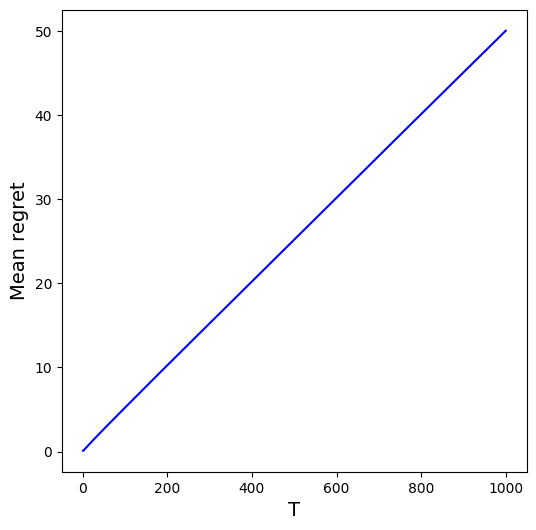

In [5]:
figname = "part1question1d"
plot_mean_regret_T(figname, mean_regret_1d)

## Question 2: UCB

### Question 2.G

In [6]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.5, 0.6]  # Success probabilities of the arms
T = 1000        # Time horizon
s2 = 1/4        # Subgaussian parameter

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCB(2, s2)
    regret.append( simulate(bb, alg, T) )

mean_regret_2g = compute_mean_regret(regret)

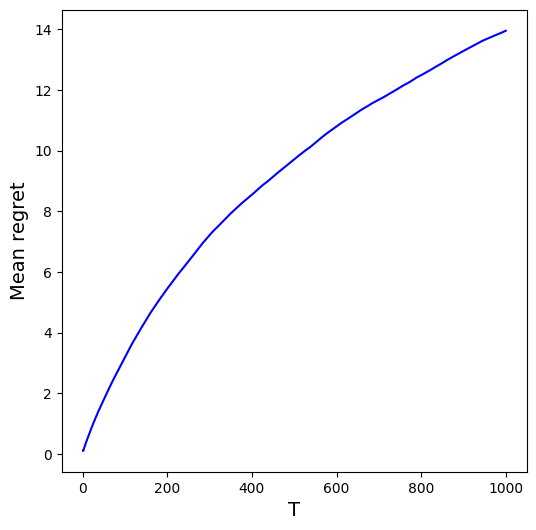

In [7]:
figname = "part1question2g"
plot_mean_regret_T(figname, mean_regret_2g)

### Question 2.H

In [8]:
s2_list = [0, 1/32, 1/16, 1/4, 1]

repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.5, 0.6]  # Success probabilities of the arms
T = 1000        # Time horizon

mean_regret_s2_2h1 = []
for s2 in s2_list:
    regret = []
    for i in range(repeat):
        print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
        bb = BernoulliBandit(2, p)
        alg = UCB(2, s2)
        regret.append( simulate(bb, alg, T) )
    mean_regret = compute_mean_regret(regret)[-1]
    mean_regret_s2_2h1.append(mean_regret)

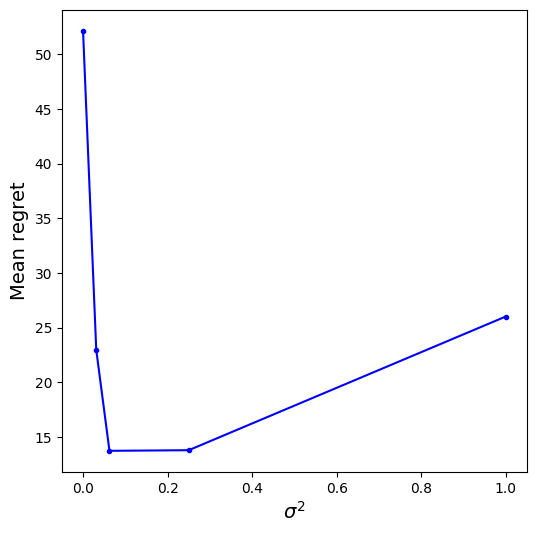

In [9]:
figname = "part1question2h1"
plot_mean_regret_s2(figname, s2_list, mean_regret_s2_2h1)

In [10]:
s2_list = [0, 1/32, 1/16, 1/4, 1]

repeat = 1000       # Number of repetitions
K = 2               # Number of arms
p = [0.85, 0.95]    # Success probabilities of the arms
T = 1000            # Time horizon

mean_regret_s2_2h2 = []
for s2 in s2_list:
    regret = []
    for i in range(repeat):
        print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
        bb = BernoulliBandit(2, p)
        alg = UCB(2, s2)
        regret.append( simulate(bb, alg, T) )
    mean_regret = compute_mean_regret(regret)[-1]
    mean_regret_s2_2h2.append(mean_regret)

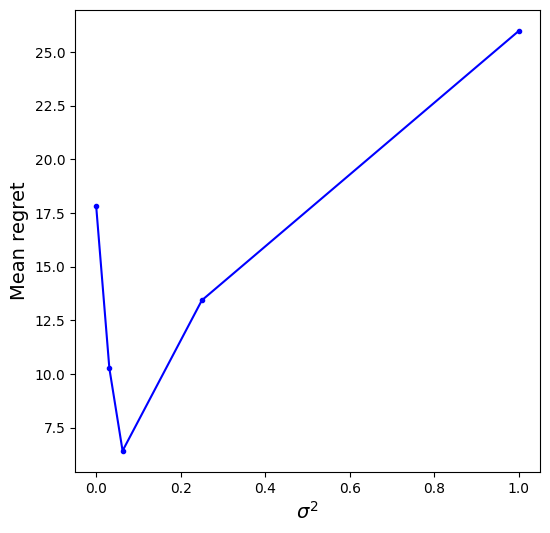

In [11]:
figname = "part1question2h2"
plot_mean_regret_s2(figname, s2_list, mean_regret_s2_2h2)

## Question 5: UCB-V

### Question 5.D

In [13]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.5, 0.6]  # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCBV(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_5d = compute_mean_regret(regret)

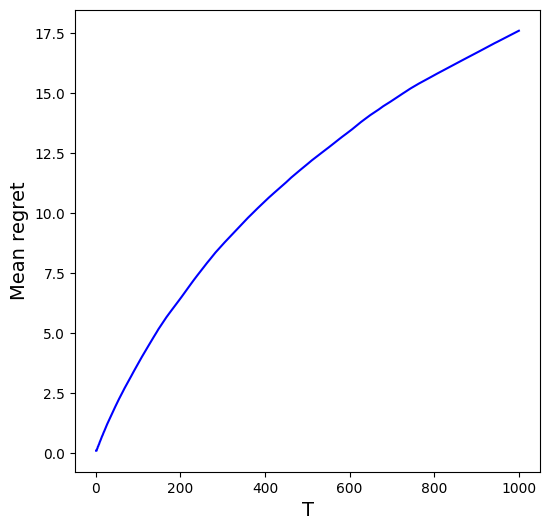

In [14]:
figname = "part1question5d"
plot_mean_regret_T(figname, mean_regret_5d)

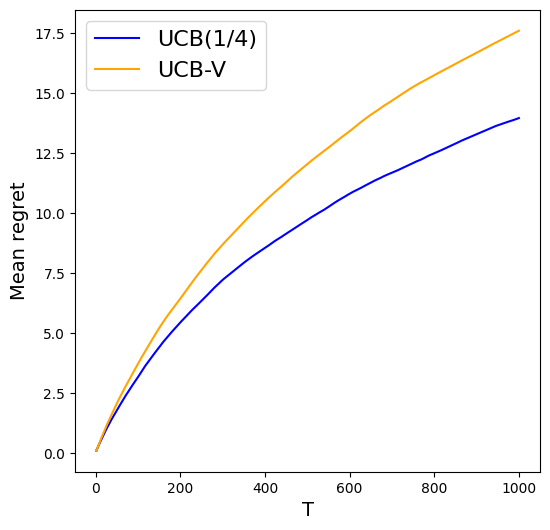

In [15]:
figname = "part1question5d_UCB_UCBV"

plot_UCB_UCBV(figname, mean_regret_2g, mean_regret_5d)

### Question 5.E

In [16]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.1, 0.2]  # Success probabilities of the arms
T = 1000        # Time horizon
s2 = 1/4        # Subgaussian parameter

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCB(2, s2)
    regret.append( simulate(bb, alg, T) )

mean_regret_5e_ucb_01_02 = compute_mean_regret(regret)

In [17]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.1, 0.2]  # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCBV(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_5e_ucbv_01_02 = compute_mean_regret(regret)

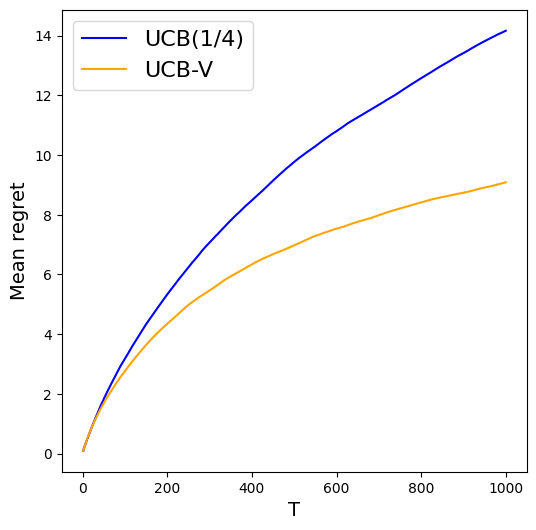

In [18]:
figname = "part1question5e_0.1_0.2_UCB_UCBV"

plot_UCB_UCBV(figname, mean_regret_5e_ucb_01_02, mean_regret_5e_ucbv_01_02)

In [19]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0, 0.1]    # Success probabilities of the arms
T = 1000        # Time horizon
s2 = 1/4        # Subgaussian parameter

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCB(2, s2)
    regret.append( simulate(bb, alg, T) )

mean_regret_5e_ucb_0_01 = compute_mean_regret(regret)

In [20]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0, 0.1]    # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = UCBV(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_5e_ucbv_0_01 = compute_mean_regret(regret)

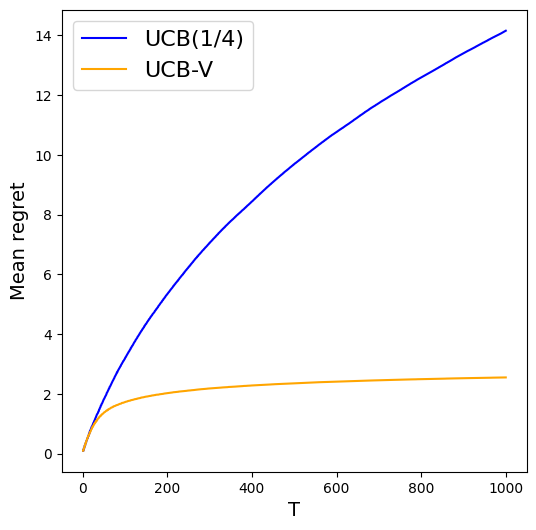

In [21]:
figname = "part1question5e_0_0.1_UCB_UCBV"

plot_UCB_UCBV(figname, mean_regret_5e_ucb_0_01, mean_regret_5e_ucbv_0_01)

## Question 6: Thompson Sampling

### Question 6.C

In [22]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.5, 0.6]  # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = ThompsonSampling(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_6c = compute_mean_regret(regret)

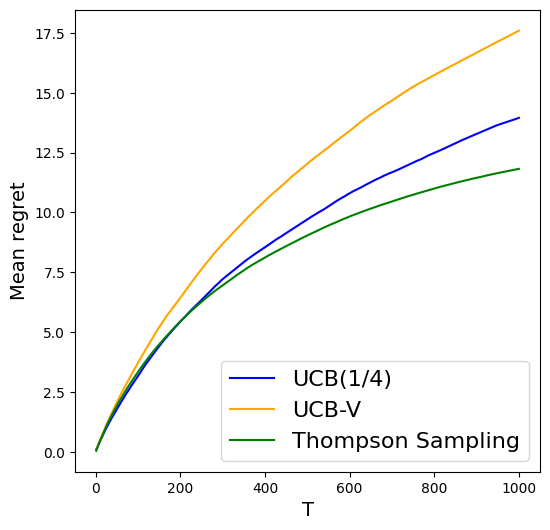

In [24]:
figname = "part1question6c_UCB_UCBV_Thompson"

plot_UCB_UCBV_Thompson(figname, mean_regret_2g, mean_regret_5d, mean_regret_6c)

In [25]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0.1, 0.2]  # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = ThompsonSampling(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_6c_01_02 = compute_mean_regret(regret)

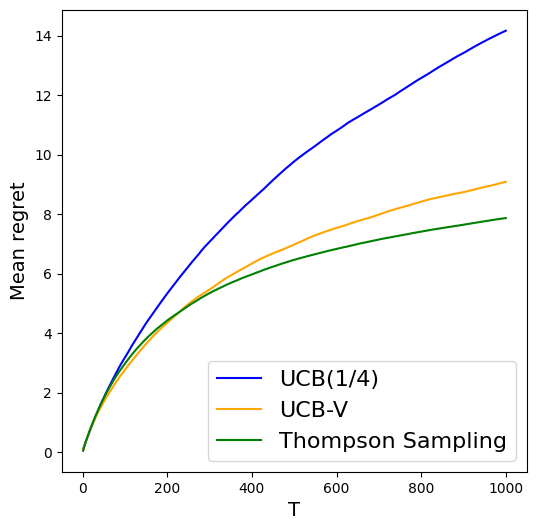

In [26]:
figname = "part1question6c_0.1_0.2_UCB_UCBV_Thompson"

plot_UCB_UCBV_Thompson(figname, mean_regret_5e_ucb_01_02, mean_regret_5e_ucbv_01_02, mean_regret_6c_01_02)

In [27]:
repeat = 1000   # Number of repetitions
K = 2           # Number of arms
p = [0, 0.1]    # Success probabilities of the arms
T = 1000        # Time horizon

regret = []
for i in range(repeat):
    print("Repetition: {:4d}/{}".format(i+1, repeat), end='\r')
    bb = BernoulliBandit(2, p)
    alg = ThompsonSampling(2)
    regret.append( simulate(bb, alg, T) )

mean_regret_6c_0_01 = compute_mean_regret(regret)

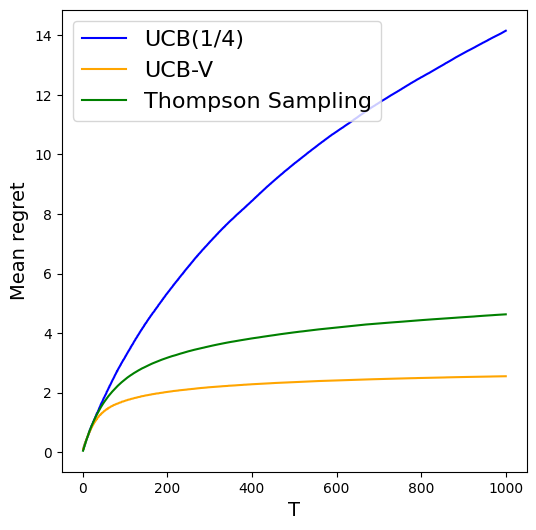

In [29]:
figname = "part1question6c_0_0.1_UCB_UCBV_Thompson"

plot_UCB_UCBV_Thompson(figname, mean_regret_5e_ucb_0_01, mean_regret_5e_ucbv_0_01, mean_regret_6c_0_01)